# Explantory Data Analysis

# Imports


In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import datetime as dt
import holidays
import seaborn as sns

# Data upload 

In [2]:
shop_data=pd.read_csv('../raw_data/shop_data_cleaned.csv')
shop_data=shop_data.drop(columns=['Unnamed: 0'], axis=1)
shop_data.head()

,Day,orders,total_sales
0,2021-07-01,10,414.85
1,2021-07-02,6,229.95
2,2021-07-03,10,459.89
3,2021-07-04,17,508.36
4,2021-07-05,13,399.88


In [3]:
google_data=pd.read_csv('../raw_data/google_data_cleaned.csv')
google_data=google_data.drop(columns=['Unnamed: 0'], axis=1)
google_data.head()

,Day,google_costs,google_impressions,google_clicks
0,2022-01-10,1.91,65,29
1,2021-08-05,2.61,62,24
2,2022-06-26,5.15,142,43
3,2023-07-10,215.64,8,398
4,2021-05-15,0.01,5,1


In [4]:
fb_data=pd.read_csv('../raw_data/fb_data_cleaned.csv')
fb_data=fb_data.drop(columns=['Unnamed: 0'], axis=1)
fb_data.head()

,Day,fb_costs,fb_impressions,fb_clicks
0,2023-08-24,1487.41,386594,839
1,2023-08-23,1315.81,337607,841
2,2023-08-22,1335.84,340325,839
3,2023-08-21,2210.01,595105,1284
4,2023-08-20,2148.53,555740,1366


In [5]:
tt_data=pd.read_csv('../raw_data/tt_data_cleaned.csv')
tt_data=tt_data.drop(columns=['Unnamed: 0'], axis=1)
tt_data.head()

,Day,tt_costs,tt_impressions,tt_clicks
0,2022-07-01,320.00,122647,627
1,2022-07-02,320.00,111337,624
2,2022-07-03,368.29,137325,667
3,2022-07-04,418.56,158848,885
4,2022-07-05,420.00,178959,1011


In [6]:
df=pd.read_csv('../raw_data/df.csv')
df=df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,0,0
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,0,0
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,0,0
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,0,0
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,0,0


# Var creation

In [7]:
#total spend creation 
channels_spend = ["tt_costs", "fb_costs", "google_costs"]
df["Total_Spend"] = df[channels_spend].sum(axis=1)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,0,0,258.18
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,0,0,251.14
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,0,0,249.31
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,0,0,258.12
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,0,0,257.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740,1366,466.56,70,801,0.0,0,0,2615.09
781,2023-08-21,356,15348.42,2210.01,595105,1284,400.58,51,782,0.0,0,0,2610.59
782,2023-08-22,150,6054.53,1335.84,340325,839,289.46,50,619,0.0,0,0,1625.30
783,2023-08-23,130,4810.67,1315.81,337607,841,275.86,52,537,0.0,0,0,1591.67


In [8]:
#return on invesment column
df['ROI']=df['total_sales']/ df['Total_Spend']
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,0,0,258.18,1.606825
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,0,0,251.14,0.915625
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,0,0,249.31,1.844651
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,0,0,258.12,1.969472
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,0,0,257.85,1.550824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740,1366,466.56,70,801,0.0,0,0,2615.09,5.207075
781,2023-08-21,356,15348.42,2210.01,595105,1284,400.58,51,782,0.0,0,0,2610.59,5.879292
782,2023-08-22,150,6054.53,1335.84,340325,839,289.46,50,619,0.0,0,0,1625.30,3.725177
783,2023-08-23,130,4810.67,1315.81,337607,841,275.86,52,537,0.0,0,0,1591.67,3.022404


## adding time var  

In [9]:
df["Day"]=pd.to_datetime(df["Day"])

In [10]:
#jan_season value to check if in Jan new year resolutions sales increase
df["Jan_Season"]=df["Day"].dt.month.isin([1]).astype(int)
df


,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,Jan_Season
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,0,0,258.18,1.606825,0
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,0,0,251.14,0.915625,0
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,0,0,249.31,1.844651,0
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,0,0,258.12,1.969472,0
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,0,0,257.85,1.550824,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740,1366,466.56,70,801,0.0,0,0,2615.09,5.207075,0
781,2023-08-21,356,15348.42,2210.01,595105,1284,400.58,51,782,0.0,0,0,2610.59,5.879292,0
782,2023-08-22,150,6054.53,1335.84,340325,839,289.46,50,619,0.0,0,0,1625.30,3.725177,0
783,2023-08-23,130,4810.67,1315.81,337607,841,275.86,52,537,0.0,0,0,1591.67,3.022404,0


In [11]:
# Adding holiday calendar 2022 & 2023 Germany to see if holidays influnce more or less on the total sales
holidays.Germany(years=[2022,2023]).keys()
df["holidays"]=df["Day"].isin(holidays.Germany(years=[2021,2022,2023]).keys()).astype(int)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,Jan_Season,holidays
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,0,0,258.18,1.606825,0,0
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,0,0,251.14,0.915625,0,0
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,0,0,249.31,1.844651,0,0
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,0,0,258.12,1.969472,0,0
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,0,0,257.85,1.550824,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740,1366,466.56,70,801,0.0,0,0,2615.09,5.207075,0,0
781,2023-08-21,356,15348.42,2210.01,595105,1284,400.58,51,782,0.0,0,0,2610.59,5.879292,0,0
782,2023-08-22,150,6054.53,1335.84,340325,839,289.46,50,619,0.0,0,0,1625.30,3.725177,0,0
783,2023-08-23,130,4810.67,1315.81,337607,841,275.86,52,537,0.0,0,0,1591.67,3.022404,0,0


In [12]:
#end and start of the month variable people after erecieving their salary are willing to spend more money
df["Month_end_start"]=df["Day"].dt.is_month_end.astype(int) + df["Day"].dt.is_month_start.astype(int)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,Jan_Season,holidays,Month_end_start
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,0,0,258.18,1.606825,0,0,1
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,0,0,251.14,0.915625,0,0,0
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,0,0,249.31,1.844651,0,0,0
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,0,0,258.12,1.969472,0,0,0
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,0,0,257.85,1.550824,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740,1366,466.56,70,801,0.0,0,0,2615.09,5.207075,0,0,0
781,2023-08-21,356,15348.42,2210.01,595105,1284,400.58,51,782,0.0,0,0,2610.59,5.879292,0,0,0
782,2023-08-22,150,6054.53,1335.84,340325,839,289.46,50,619,0.0,0,0,1625.30,3.725177,0,0,0
783,2023-08-23,130,4810.67,1315.81,337607,841,275.86,52,537,0.0,0,0,1591.67,3.022404,0,0,0


In [13]:
#created month list I think this can be delted as later we will see it does not influnce our data beside Jan 
months_list=list(df["Day"].dt.month.unique())
months_list=months_list[:]
months_list

for m in months_list:
    df["m"+str(m)]=0 
    df.loc[df["Day"].dt.month==m,"m"+str(m)]=1
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,m9,m10,m11,m12,m1,m2,m3,m4,m5,m6
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740,1366,466.56,70,801,0.0,...,0,0,0,0,0,0,0,0,0,0
781,2023-08-21,356,15348.42,2210.01,595105,1284,400.58,51,782,0.0,...,0,0,0,0,0,0,0,0,0,0
782,2023-08-22,150,6054.53,1335.84,340325,839,289.46,50,619,0.0,...,0,0,0,0,0,0,0,0,0,0
783,2023-08-23,130,4810.67,1315.81,337607,841,275.86,52,537,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df["working_day"]=0
df.loc[df["Day"].dt.weekday<5,"working_day"]=1


# Data exploration based on time 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Day                 785 non-null    datetime64[ns]
 1   orders              785 non-null    int64         
 2   total_sales         785 non-null    float64       
 3   fb_costs            785 non-null    float64       
 4   fb_impressions      785 non-null    int64         
 5   fb_clicks           785 non-null    int64         
 6   google_costs        785 non-null    float64       
 7   google_impressions  785 non-null    int64         
 8   google_clicks       785 non-null    int64         
 9   tt_costs            785 non-null    float64       
 10  tt_impressions      785 non-null    int64         
 11  tt_clicks           785 non-null    int64         
 12  Total_Spend         785 non-null    float64       
 13  ROI                 785 non-null    float64       

## days Friday Saturday

<Axes: xlabel='Day'>

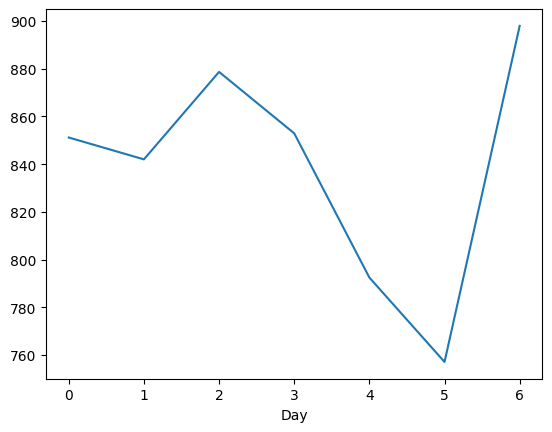

In [17]:
# Shows that on day 4 & 5 (fri, sat) of the week we have less transactions on average
df.groupby(df["Day"].dt.weekday)["Total_Spend"].mean().plot()




<Axes: xlabel='Day'>

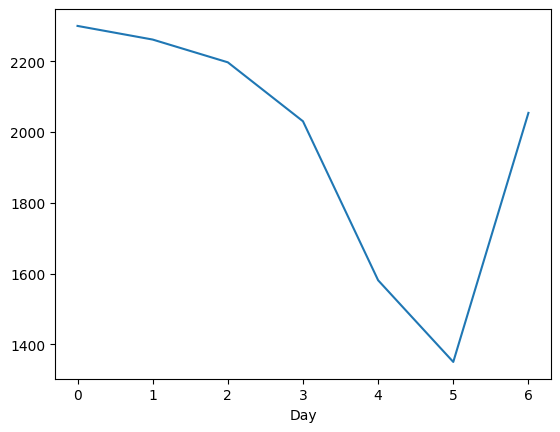

In [18]:
# Shows that on day 4 & 5 (fri, sat) of the week we have less total_sales on average
df.groupby(df["Day"].dt.weekday)["total_sales"].mean().plot()


<Axes: xlabel='Day'>

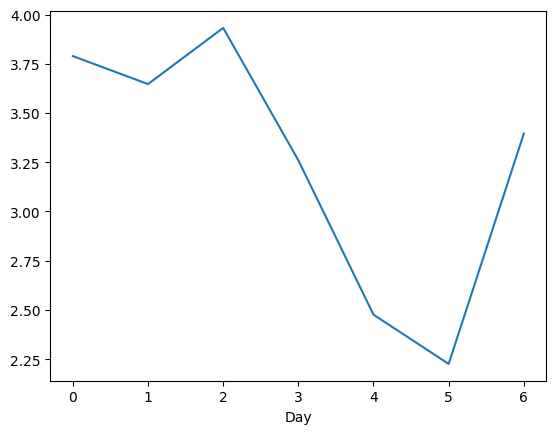

In [19]:
# Shows that on day 4 & 5 (fri, sat) of the week we have less ROI on average
df.groupby(df["Day"].dt.weekday)["ROI"].mean().plot()


In [ ]:
#Summary on friday and saturday there is less spends on adv but also less sales

# google

In [20]:
google_data.columns

Index(['Day', 'google_costs', 'google_impressions', 'google_clicks'], dtype='object')

In [21]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day                 1126 non-null   object 
 1   google_costs        1126 non-null   float64
 2   google_impressions  1126 non-null   int64  
 3   google_clicks       1126 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 35.3+ KB


In [22]:
google_data.describe()

,google_costs,google_impressions,google_clicks
count,1126.000000,1126.000000,1126.000000
mean,74.890409,40.650089,123.318828
std,114.397852,70.381514,165.031780
min,0.000000,0.000000,0.000000
25%,0.480000,8.000000,9.000000
50%,5.800000,17.000000,43.000000
75%,120.455000,44.000000,200.750000
max,991.360000,990.000000,985.000000


In [23]:
# Convert 'Day' column to datetime type
google_data['Day'] = pd.to_datetime(google_data['Day'])

# Set 'Day' column as index
google_data.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(google_data.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
google_data_monthly = google_data.resample('M').sum()
google_data_monthly

DatetimeIndex(['2022-01-10', '2021-08-05', '2022-06-26', '2023-07-10',
               '2021-05-15', '2022-09-07', '2021-06-13', '2020-09-12',
               '2020-10-13', '2022-08-05',
               ...
               '2020-08-25', '2023-06-13', '2021-10-02', '2021-12-27',
               '2020-12-30', '2022-01-04', '2020-12-12', '2022-03-19',
               '2022-03-03', '2023-04-18'],
              dtype='datetime64[ns]', name='Day', length=1126, freq=None)


,google_costs,google_impressions,google_clicks
Day,,,
2020-07-31,14.53,633,309
2020-08-31,37.77,1807,895
2020-09-30,36.57,1718,743
2020-10-31,13.24,692,298
2020-11-30,9.45,300,126
2020-12-31,6.10,188,78
2021-01-31,4.74,295,104
2021-02-28,5.56,330,87
2021-03-31,6.29,247,86


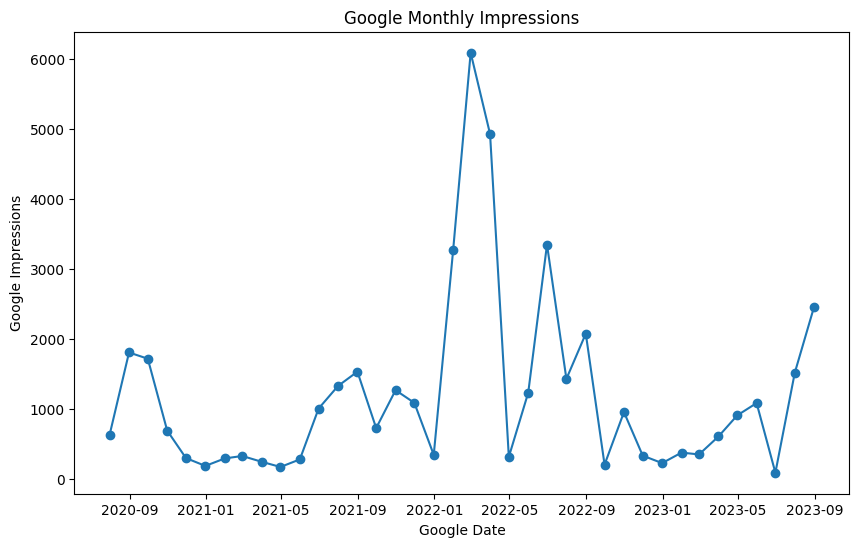

In [24]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_impressions'], marker='o')

# Set plot title and labels
plt.title('Google Monthly Impressions')
plt.xlabel('Google Date')
plt.ylabel('Google Impressions')

# Show the plot
plt.show()

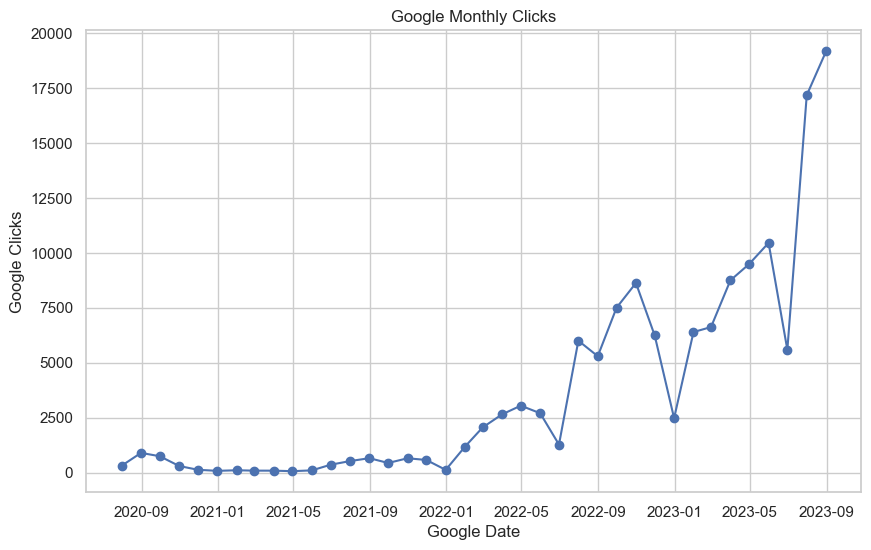

In [107]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_clicks'], marker='o')

# Set plot title and labels
plt.title('Google Monthly Clicks')
plt.xlabel('Google Date')
plt.ylabel('Google Clicks')

# Show the plot
plt.show()

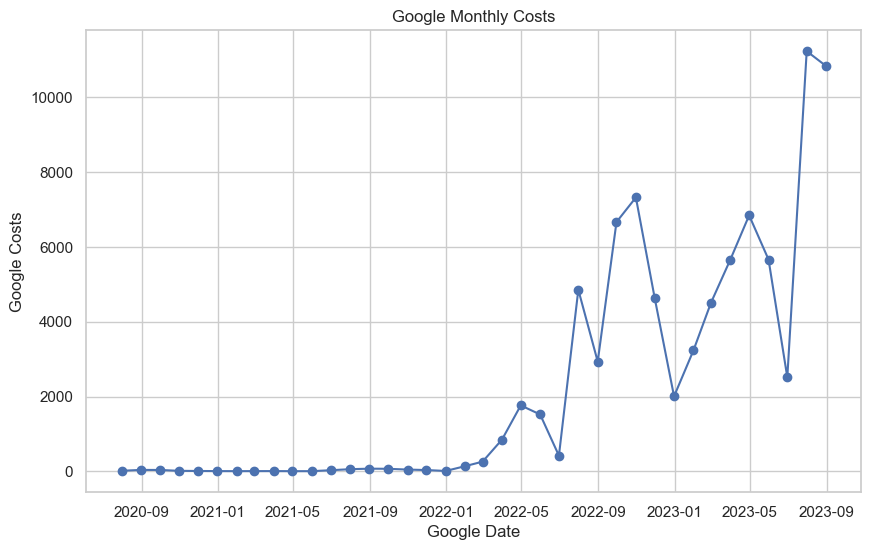

In [108]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_costs'], marker='o')

# Set plot title and labels
plt.title('Google Monthly Costs')
plt.xlabel('Google Date')
plt.ylabel('Google Costs')

# Show the plot
plt.show()

In [25]:
google_data[google_data.google_impressions <10].shape[0]

355

<Axes: xlabel='google_impressions', ylabel='Count'>

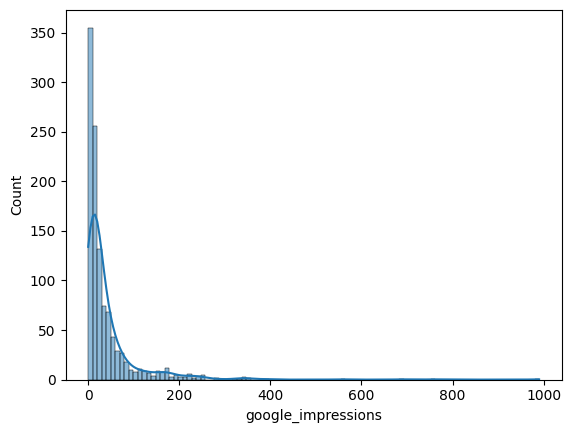

In [26]:
sns.histplot(google_data['google_impressions'], bins=100, kde=True)

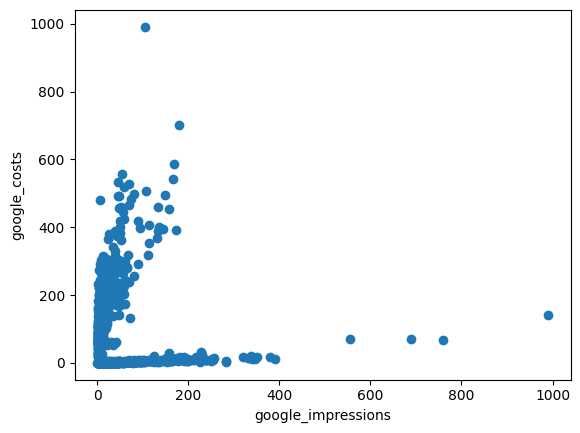

In [27]:
plt.scatter(google_data['google_impressions'], google_data['google_costs'])
plt.xlabel('google_impressions')
plt.ylabel('google_costs');

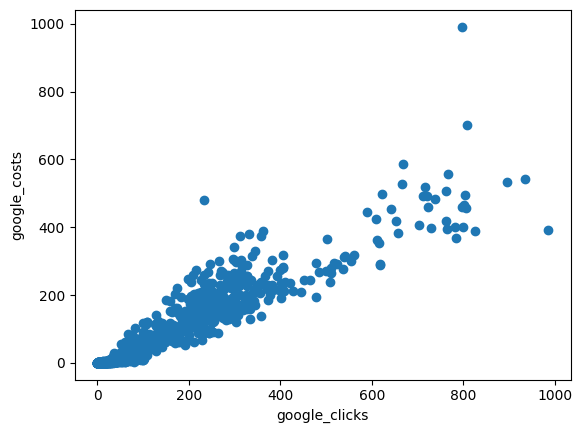

In [28]:
plt.scatter(google_data['google_clicks'], google_data['google_costs'])
plt.xlabel('google_clicks')
plt.ylabel('google_costs');

In [29]:
google_corr=google_data.corr()

<Axes: >

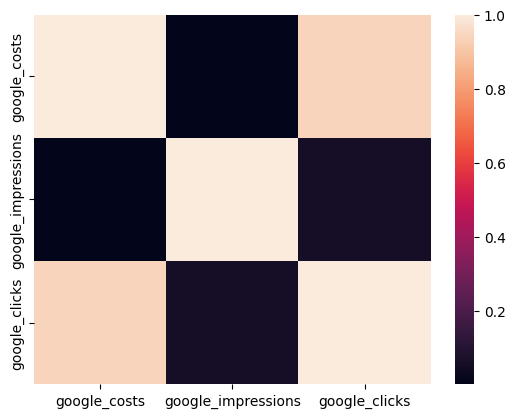

In [30]:
sns.heatmap(google_corr)

/Users/noaruccius/.pyenv/versions/3.10.6/envs/MMM-project-lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


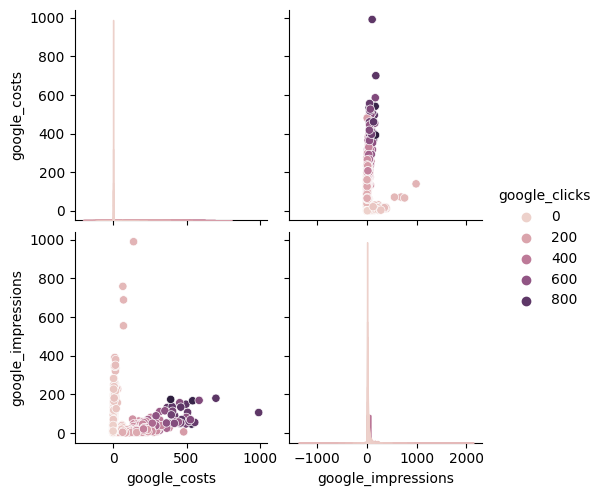

<Figure size 500x500 with 0 Axes>

In [31]:
sns.pairplot(google_data, hue="google_clicks")
plt.figure(figsize=(5,5))
plt.show()

## Summary Google Data

- it seems like in Google the costs is not correlated to impressions but really relates to the amount of clicks. This data can make sense as people who are actually interested in the product might Google it and therefore click on the website. 

- it also seems like that in 09/2023 and 09/2022 there were more costs spend on Google advertisement and therefore there is a clear spike in clicks and impression. 

- I am yet to understand the reasoning behind the spike in Impressions between 2021.1-2021.05

# fb

In [32]:
fb_data.columns

Index(['Day', 'fb_costs', 'fb_impressions', 'fb_clicks'], dtype='object')

In [33]:
fb_data.describe()

,fb_costs,fb_impressions,fb_clicks
count,859.000000,859.000000,859.000000
mean,661.242771,127260.725262,449.200233
std,437.560510,90775.943573,295.079128
min,1.230000,123.000000,0.000000
25%,311.450000,56959.000000,217.500000
50%,619.770000,116252.000000,427.000000
75%,944.035000,180968.000000,626.000000
max,2294.690000,595105.000000,2033.000000


In [34]:
# Convert 'Day' column to datetime type
fb_data['Day'] = pd.to_datetime(fb_data['Day'])

# Set 'Day' column as index
fb_data.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(fb_data.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
fb_data_monthly = fb_data.resample('M').sum()
fb_data_monthly

DatetimeIndex(['2023-08-24', '2023-08-23', '2023-08-22', '2023-08-21',
               '2023-08-20', '2023-08-19', '2023-08-18', '2023-08-17',
               '2023-08-16', '2023-08-15',
               ...
               '2020-08-03', '2020-08-02', '2020-08-01', '2020-07-31',
               '2020-07-30', '2020-07-29', '2020-07-28', '2020-07-27',
               '2020-07-26', '2020-07-25'],
              dtype='datetime64[ns]', name='Day', length=859, freq=None)


,fb_costs,fb_impressions,fb_clicks
Day,,,
2020-07-31,3498.47,591875,4010
2020-08-31,9120.94,1835664,13515
2020-09-30,7198.22,1295357,8373
2020-10-31,1925.60,289964,1740
2020-11-30,870.74,151106,810
2020-12-31,0.00,0,0
2021-01-31,0.00,0,0
2021-02-28,0.00,0,0
2021-03-31,0.00,0,0


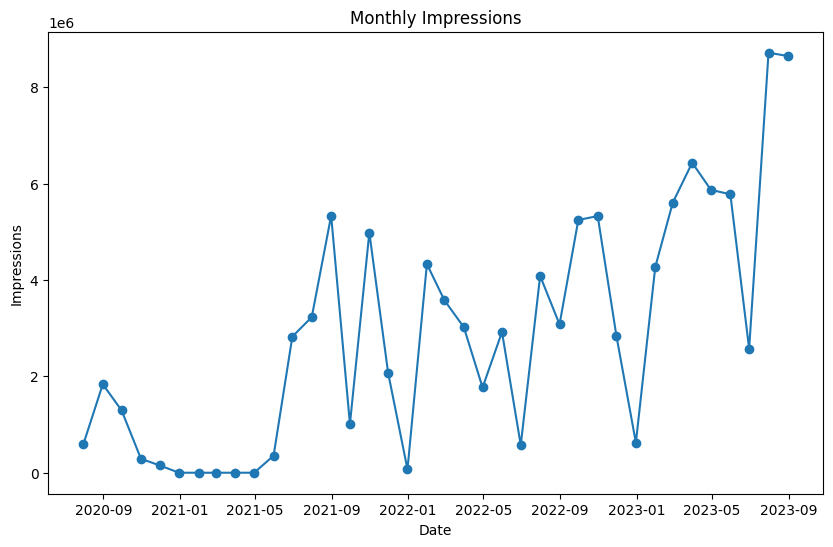

In [35]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_impressions'], marker='o')

# Set plot title and labels
plt.title('Monthly Impressions')
plt.xlabel('Date')
plt.ylabel('Impressions')

# Show the plot
plt.show()

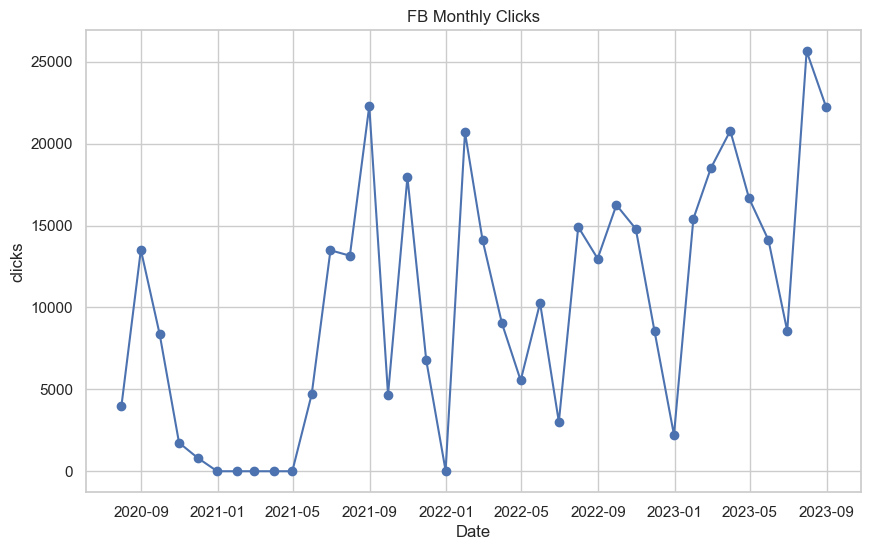

In [110]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_clicks'], marker='o')

# Set plot title and labels
plt.title('FB Monthly Clicks')
plt.xlabel('Date')
plt.ylabel('clicks')

# Show the plot
plt.show()

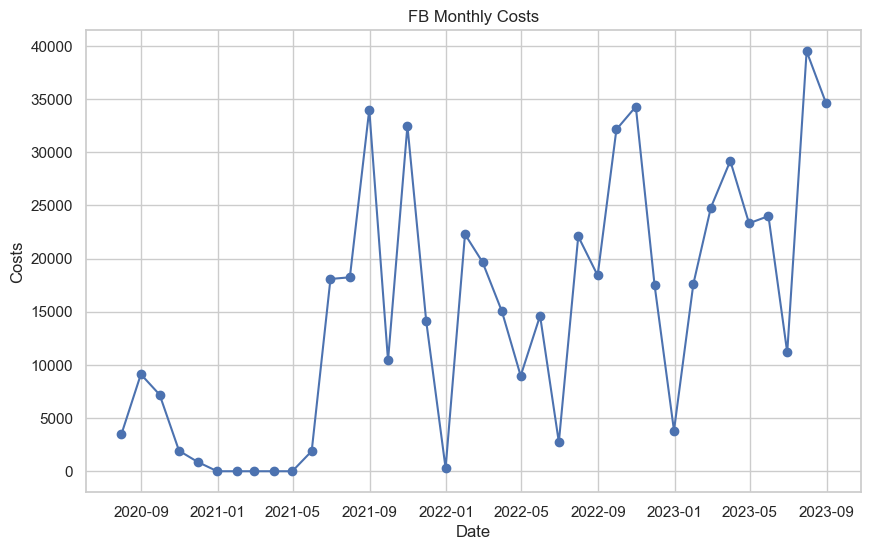

In [123]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_costs'], marker='o')

# Set plot title and labels
plt.title('FB Monthly Costs')
plt.xlabel('Date')
plt.ylabel('Costs')

# Show the plot
plt.show()

<Axes: xlabel='fb_impressions', ylabel='Count'>

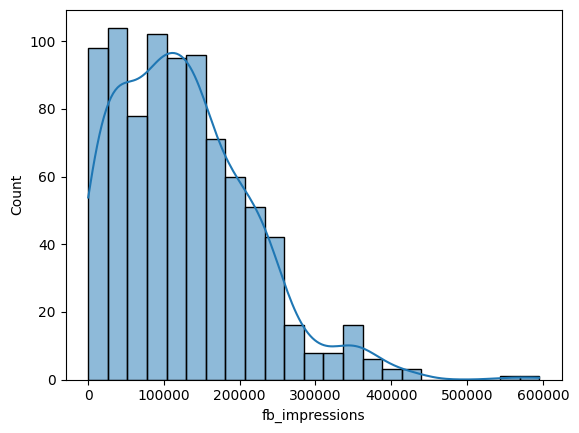

In [36]:
sns.histplot(fb_data['fb_impressions'], kde=True)

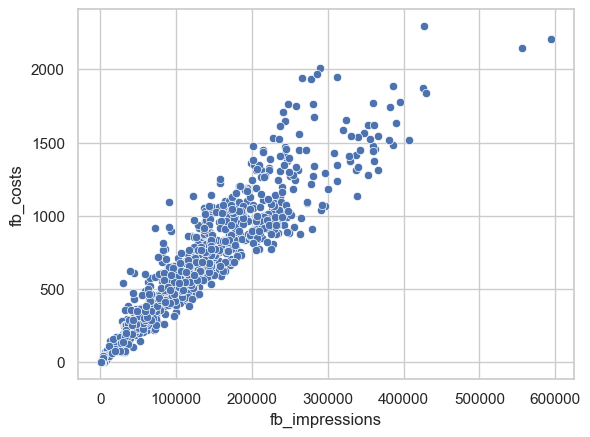

In [119]:
sns.scatterplot(data=fb_data, x="fb_impressions", y="fb_costs")
plt.xlabel('fb_impressions')
plt.ylabel('fb_costs');

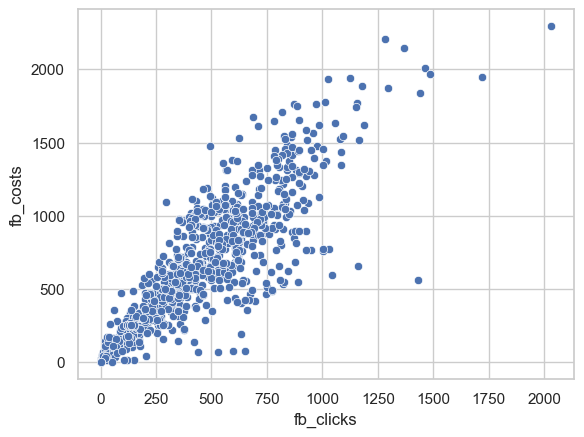

In [120]:
sns.scatterplot(data=fb_data, x="fb_clicks", y="fb_costs")
plt.xlabel('fb_clicks')
plt.ylabel('fb_costs');

In [121]:
max(fb_data['fb_clicks'])

2033

In [122]:
max(fb_data['fb_impressions'])

595105

In [38]:
fb_corr=fb_data.corr()

<Axes: >

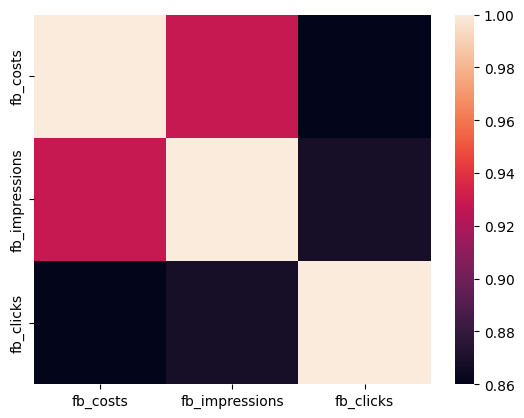

In [39]:
sns.heatmap(fb_corr)

##  Summary Facebook data analysis

- we can clearly see that compared to Google the more we spend on facebook advertisement is more correlated to impressions. in the facebook platform the more money that is invested the more impressions you have. 

- the max of Facebook clicks is 2033 compared to the max of facebook impressions which is 595105 

- The measure costs spending on facebook start in 2021 of 05 therefore there is a slow start to the success of the advertisement on facebook. 

- In addition we can see that on Jan of 2022 and 2023 the costs goes down to almost 0 

- We can also see that for some reason the spend on facebook adds are not constant 


# vizulisation of tt

In [40]:
tt_data.columns

Index(['Day', 'tt_costs', 'tt_impressions', 'tt_clicks'], dtype='object')

In [41]:
tt_data.describe()

,tt_costs,tt_impressions,tt_clicks
count,153.000000,153.000000,153.000000
mean,326.571373,129806.183007,527.483660
std,178.657618,75334.459183,285.670037
min,49.750000,19804.000000,73.000000
25%,170.000000,59361.000000,246.000000
50%,350.000000,122367.000000,545.000000
75%,449.740000,184512.000000,747.000000
max,840.370000,374925.000000,1138.000000


In [42]:

# Convert 'Day' column to datetime type
tt_data['Day'] = pd.to_datetime(tt_data['Day'])

# Set 'Day' column as index
tt_data.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(tt_data.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
tt_data_monthly = tt_data.resample('M').sum()

tt_data_monthly

DatetimeIndex(['2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-09', '2022-07-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Day', length=153, freq=None)


,tt_costs,tt_impressions,tt_clicks
Day,,,
2022-07-31,9786.79,3819565,17621
2022-08-31,7819.96,3267642,14367
2022-09-30,13125.21,4365544,14250
2022-10-31,12214.64,5547797,21004
2022-11-30,7018.82,2859798,13463


In [43]:
tt_data_monthly.index

DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30'],
              dtype='datetime64[ns]', name='Day', freq='M')

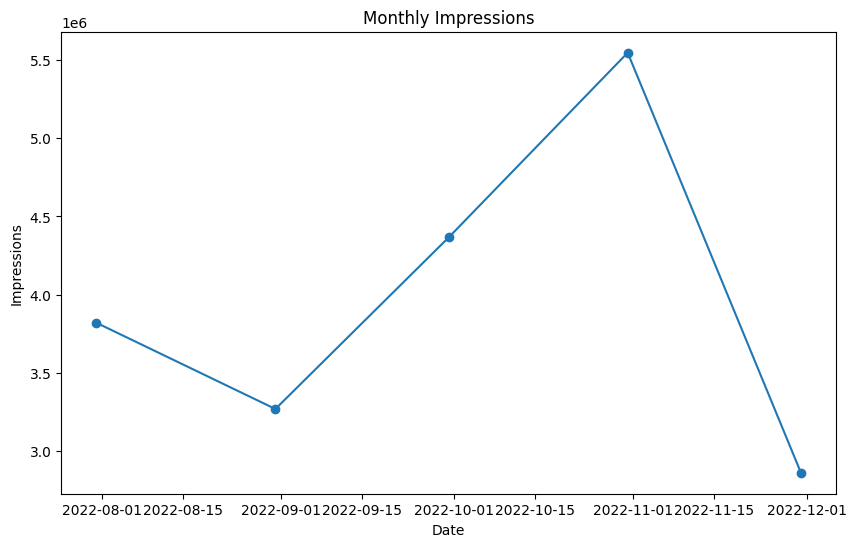

In [44]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_impressions'], marker='o')

# Set plot title and labels
plt.title('Monthly Impressions')
plt.xlabel('Date')
plt.ylabel('Impressions')

# Show the plot
plt.show()

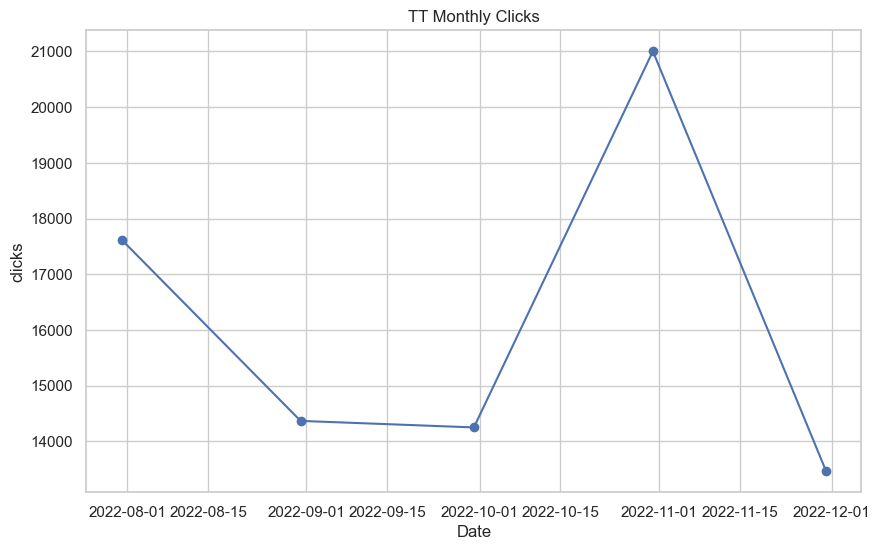

In [97]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_clicks'], marker='o')

# Set plot title and labels
plt.title('TT Monthly Clicks')
plt.xlabel('Date')
plt.ylabel('clicks')

# Show the plot
plt.show()

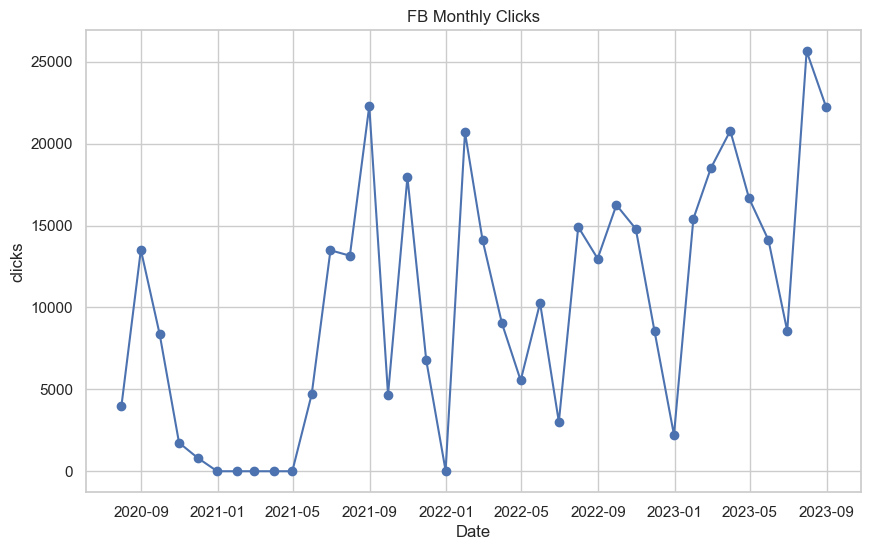

In [99]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_clicks'], marker='o')

# Set plot title and labels
plt.title('FB Monthly Clicks')
plt.xlabel('Date')
plt.ylabel('clicks')

# Show the plot
plt.show()

<Axes: xlabel='tt_impressions', ylabel='Count'>

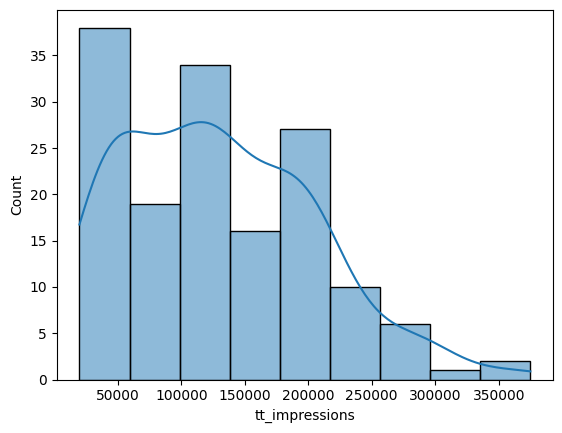

In [45]:
sns.histplot(tt_data['tt_impressions'], kde=True)

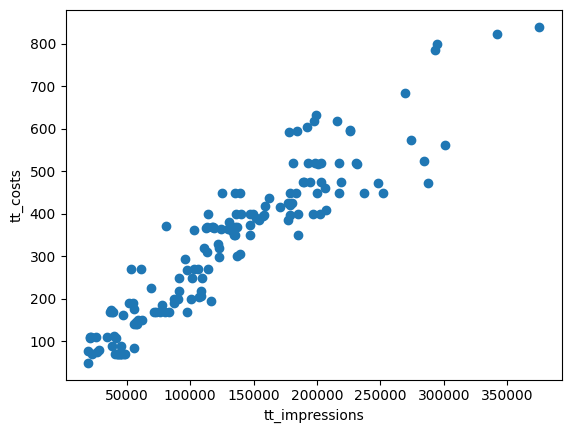

In [46]:
plt.scatter(tt_data['tt_impressions'], tt_data['tt_costs'])
plt.xlabel('tt_impressions')
plt.ylabel('tt_costs');

In [47]:
tt_corr=tt_data.corr()

<Axes: >

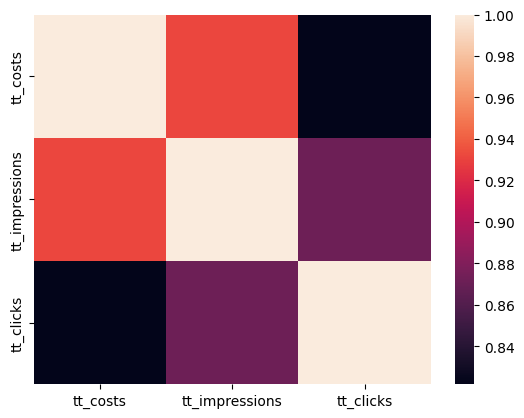

In [48]:
sns.heatmap(tt_corr)

# vizualisations of df

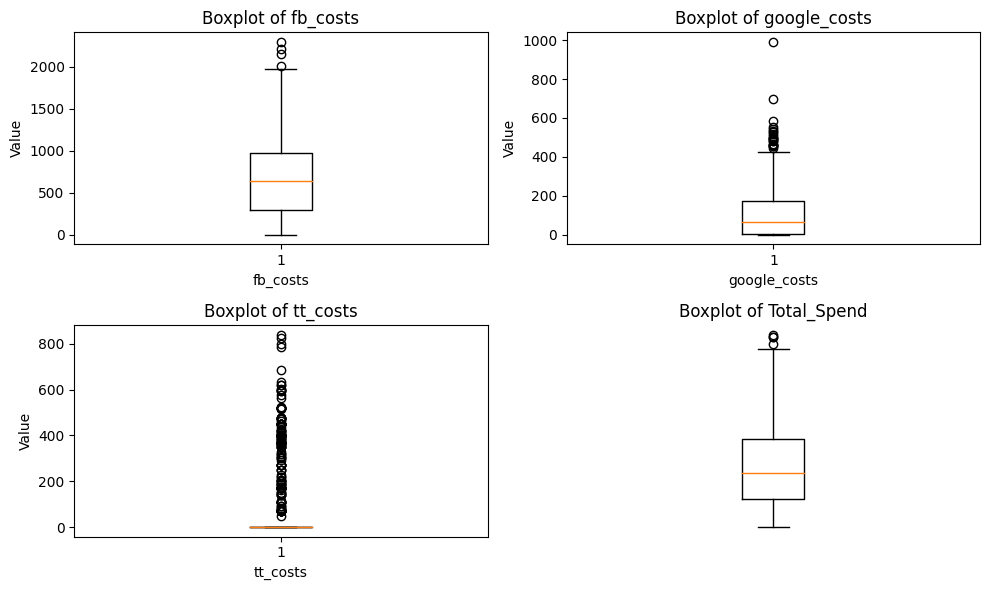

In [51]:
# Assuming df is your DataFrame

# List of columns for which you want to create boxplots
columns_to_plot = ["fb_costs", "google_costs", "tt_costs", "Total_Spend"]

# Create a figure with a grid layout of 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column and plot boxplots in the subplots
for i, column in enumerate(columns_to_plot):
        ax = axes[i]  # Get the appropriate subplot
        ax.boxplot(df[column])  # Create a boxplot
        ax.set_title(f'Boxplot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')

# Hide the unused subplot
axes[3].axis('off')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [57]:
df.columns

Index(['Day', 'orders', 'total_sales', 'fb_costs', 'fb_impressions',
       'fb_clicks', 'google_costs', 'google_impressions', 'google_clicks',
       'tt_costs', 'tt_impressions', 'tt_clicks', 'Total_Spend', 'ROI',
       'Jan_Season', 'holidays', 'Month_end_start', 'm7', 'm8', 'm9', 'm10',
       'm11', 'm12', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'working_day'],
      dtype='object')

/Users/noaruccius/.pyenv/versions/3.10.6/envs/MMM-project-lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


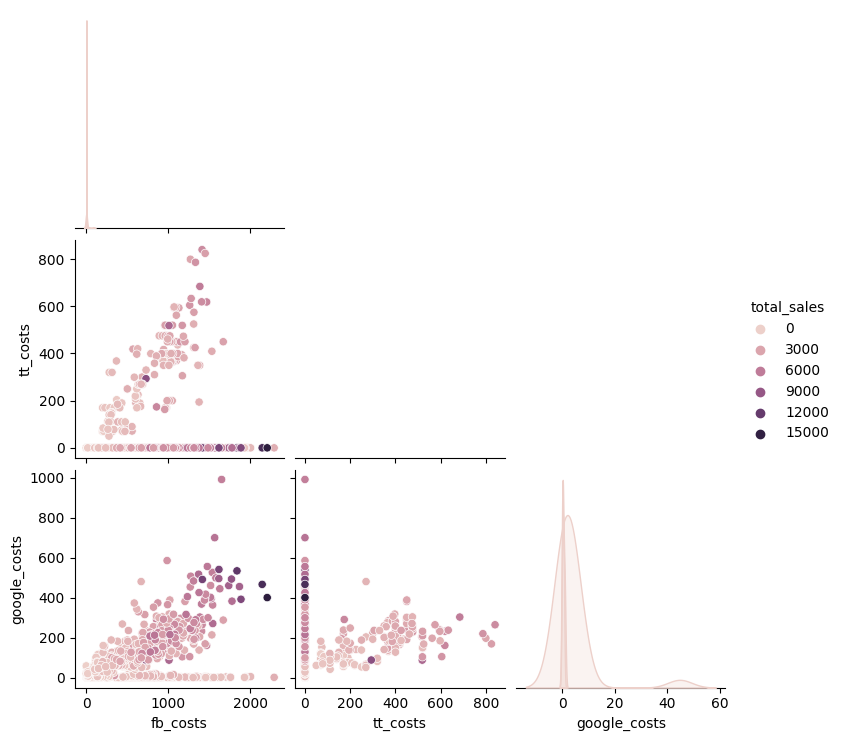

<Figure size 500x500 with 0 Axes>

In [62]:
df_selected_columns=df[['fb_costs','tt_costs', 'google_costs', 'total_sales']]
sns.pairplot(df_selected_columns, hue="total_sales", corner=True)
plt.figure(figsize=(5,5))
plt.show()

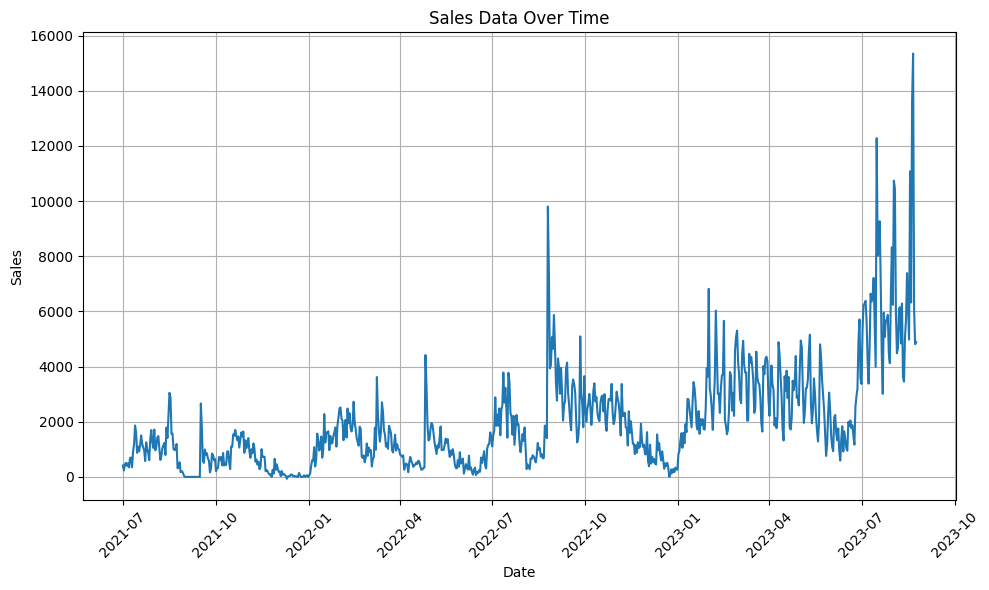

In [56]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df.Day, df['total_sales'], linestyle='-')
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# total sales compared to reach platform 

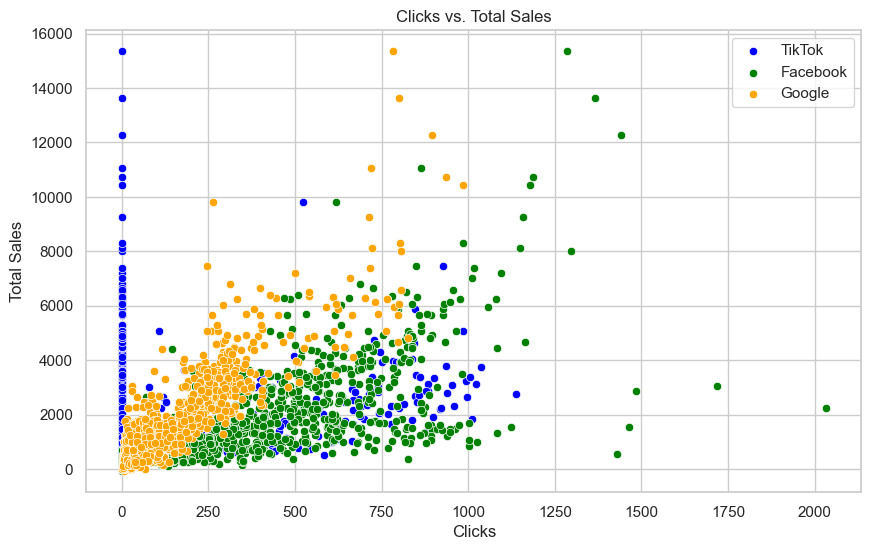

In [63]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tt_clicks', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_clicks', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_clicks', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('Clicks vs. Total Sales')
plt.xlabel('Clicks')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

# Show the plot
plt.show()

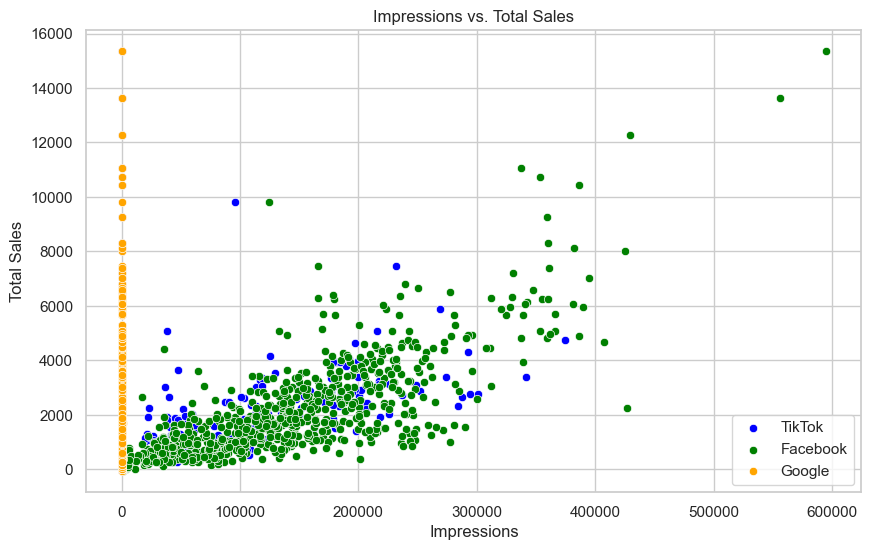

In [65]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tt_impressions', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_impressions', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_impressions', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('Impressions vs. Total Sales')
plt.xlabel('Impressions')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

# Show the plot
plt.show()

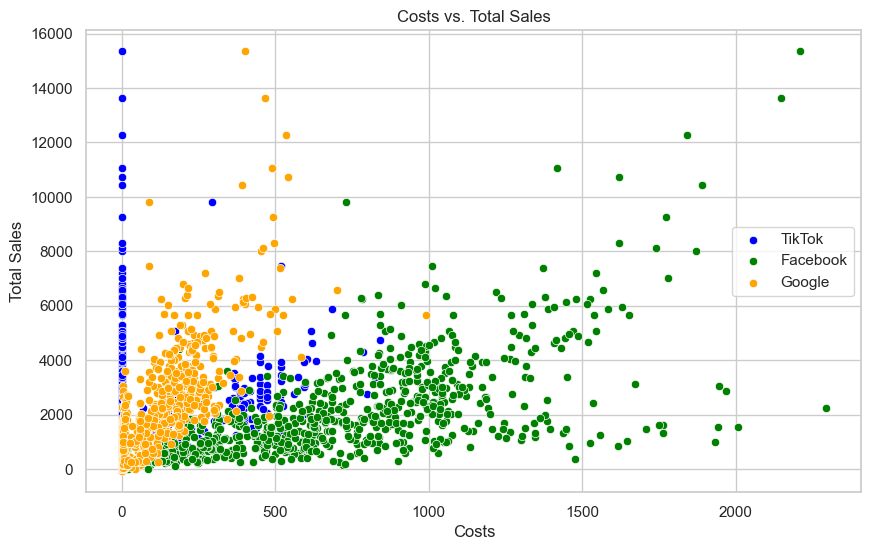

In [66]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tt_costs', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_costs', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_costs', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('Costs vs. Total Sales')
plt.xlabel('Costs')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

# Show the plot
plt.show()

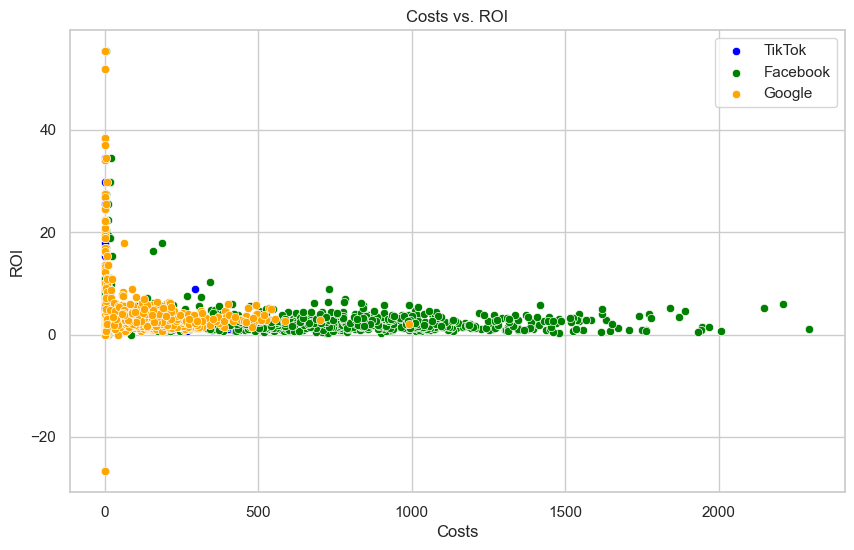

In [105]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tt_costs', y='ROI', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_costs', y='ROI', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_costs', y='ROI', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('Costs vs. ROI')
plt.xlabel('Costs')
plt.ylabel('ROI')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [72]:
df.columns

Index(['Day', 'orders', 'total_sales', 'fb_costs', 'fb_impressions',
       'fb_clicks', 'google_costs', 'google_impressions', 'google_clicks',
       'tt_costs', 'tt_impressions', 'tt_clicks', 'Total_Spend', 'ROI',
       'Jan_Season', 'holidays', 'Month_end_start', 'm7', 'm8', 'm9', 'm10',
       'm11', 'm12', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'working_day'],
      dtype='object')

In [86]:
df_corr_filter_social_media=df[['orders', 'total_sales', 'fb_costs', 'fb_impressions',
       'fb_clicks', 'google_costs', 'google_impressions', 'google_clicks',
       'tt_costs', 'tt_impressions', 'tt_clicks', 'Total_Spend']]

In [87]:

df_corr=df_corr_filter_social_media.corr()

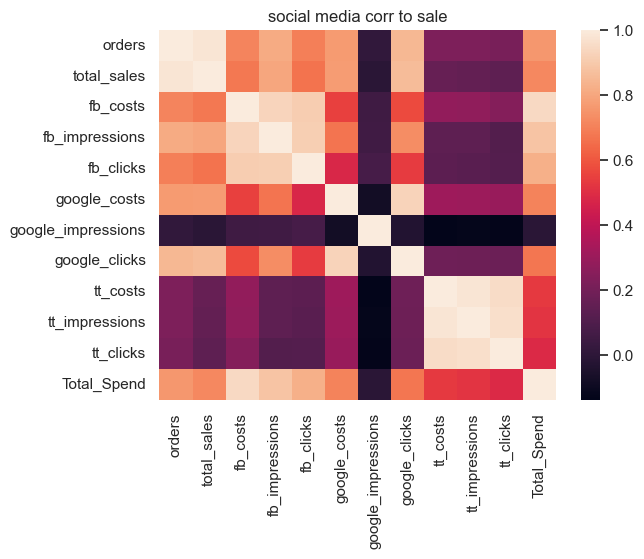

In [90]:
sns.heatmap(df_corr)
plt.title('social media corr to sale');

In [92]:
df_corr_filter_time=df[['Total_Spend', 'ROI','Jan_Season', 'holidays', 'Month_end_start', 'total_sales']]

In [94]:
df_corr_time=df_corr_filter_time.corr()

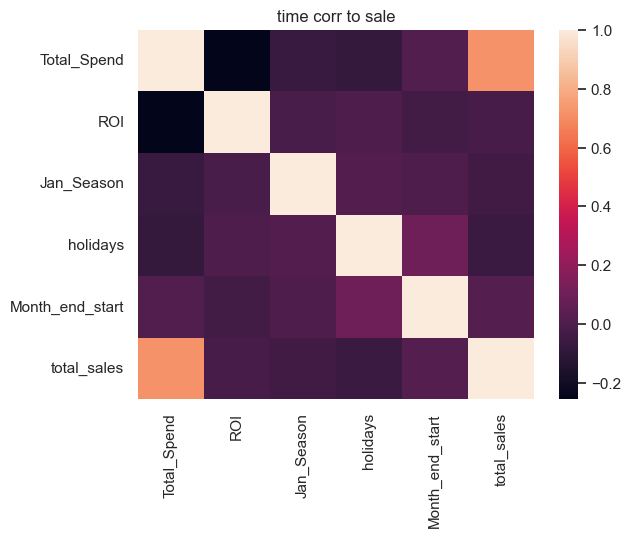

In [96]:
sns.heatmap(df_corr_time)
plt.title('time corr to sale');

In [101]:
# Convert 'Day' column to datetime type
df['Day'] = pd.to_datetime(df['Day'])

# Set 'Day' column as index
df.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(df.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
df_monthly = df.resample('M').sum()

df_monthly

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10',
               ...
               '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
               '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24'],
              dtype='datetime64[ns]', name='Day', length=785, freq=None)


,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,...,m10,m11,m12,m1,m2,m3,m4,m5,m6,working_day
Day,,,,,,,,,,,,,,,,,,,,,
2021-07-31,696,28621.07,18239.87,3229060,13159,57.15,1329,522,0.00,0,...,0,0,0,0,0,0,0,0,0,22
2021-08-31,869,33834.46,34009.52,5334003,22288,71.10,1533,654,0.00,0,...,0,0,0,0,0,0,0,0,0,22
2021-09-30,339,12793.67,10420.81,1011118,4685,67.67,728,436,0.00,0,...,0,0,0,0,0,0,0,0,0,22
2021-10-31,1072,29762.41,32494.04,4983518,17959,47.14,1269,650,0.00,0,...,31,0,0,0,0,0,0,0,0,21
2021-11-30,561,17073.13,14127.43,2075497,6794,34.29,1088,573,0.00,0,...,0,30,0,0,0,0,0,0,0,22
2021-12-31,104,1822.59,290.60,69150,40,9.99,346,122,0.00,0,...,0,0,31,0,0,0,0,0,0,23
2022-01-31,1184,37700.35,22286.03,4330075,20687,137.55,3267,1185,0.00,0,...,0,0,0,31,0,0,0,0,0,21
2022-02-28,1322,44525.78,19673.59,3578402,14132,258.75,6085,2052,0.00,0,...,0,0,0,0,28,0,0,0,0,20
2022-03-31,1280,43400.96,15038.04,3020741,9038,847.66,4925,2647,0.00,0,...,0,0,0,0,0,31,0,0,0,23


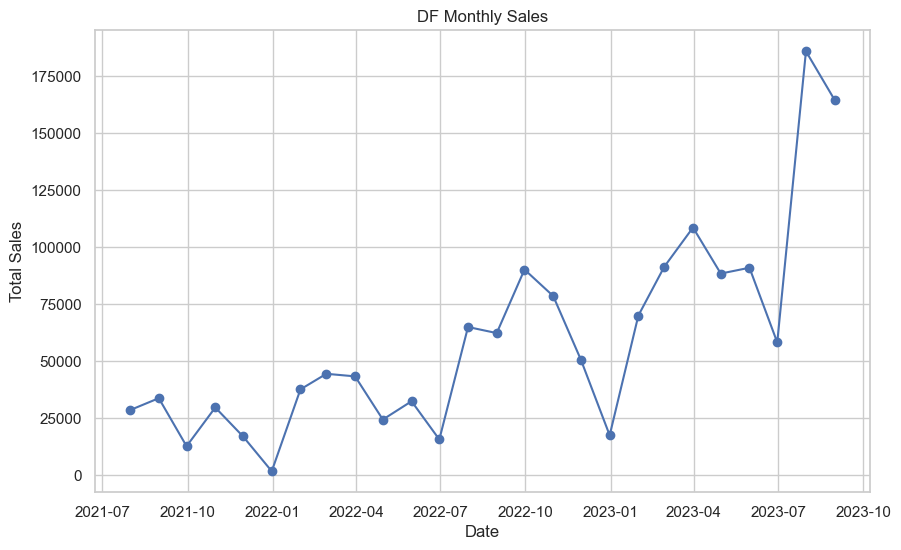

In [102]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(df_monthly.index, df_monthly['total_sales'], marker='o')

# Set plot title and labels
plt.title('DF Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

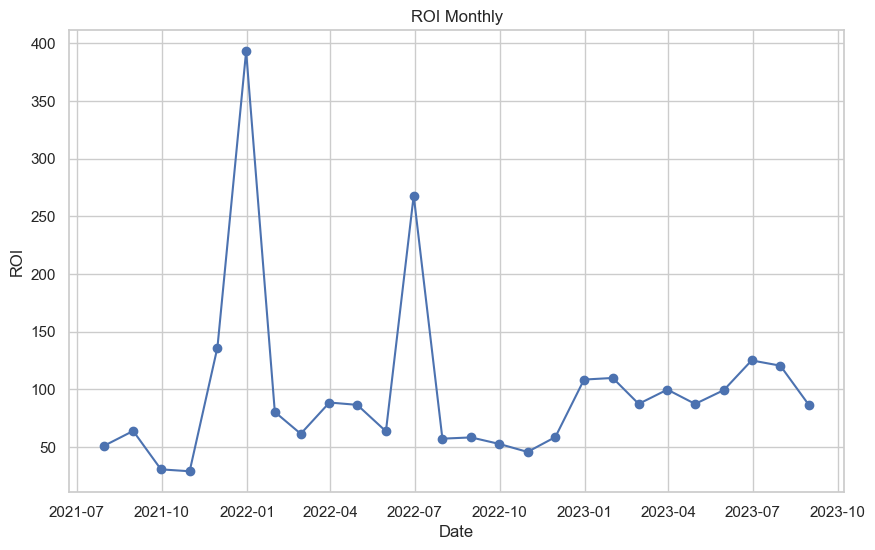

In [103]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(df_monthly.index, df_monthly['ROI'], marker='o')

# Set plot title and labels
plt.title('ROI Monthly')
plt.xlabel('Date')
plt.ylabel('ROI')

# Show the plot
plt.show()

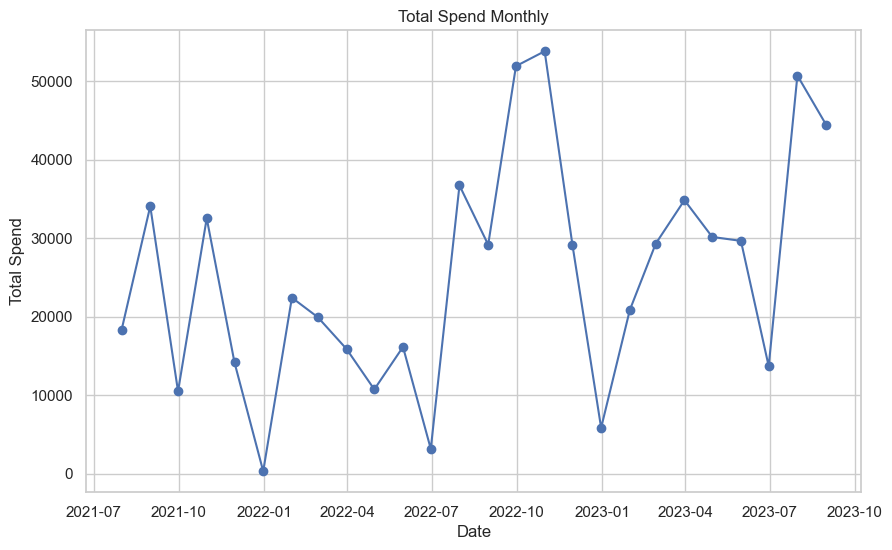

In [109]:
#mothly changes
plt.figure(figsize=(10, 6))

# Plot the 'impressions' column
plt.plot(df_monthly.index, df_monthly['Total_Spend'], marker='o')

# Set plot title and labels
plt.title('Total Spend Monthly')
plt.xlabel('Date')
plt.ylabel('Total Spend')

# Show the plot
plt.show()